# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Procesamiento digital de imágenes

### Trabajo práctico entregable

**Estudiante:**
- [Chevallier-Boutell, Ignacio José.](https://www.linkedin.com/in/nachocheva/)

**Docentes:**
- Delrieux, Claudio (LCI, UNS-CONICET).
- Bajo, Juan Miguel (ICIC, UNS-CONICET).

---

## Librerías

In [27]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

## Imagénes a usar

Se utilizará alguna de las imágenes a continuación, extraídas de la documentación de imageio.

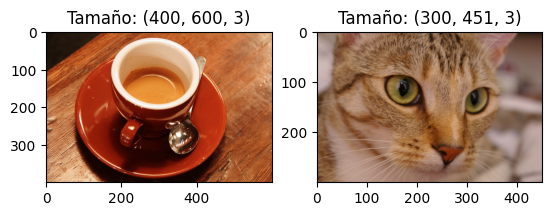

In [28]:
# Image of a cup of coffee (Rachel Michetti)
cafe = iio.imread('imageio:coffee.png')

# Image of Stefan’s cat
cat = iio.imread('imageio:chelsea.png')

fig, axs = plt.subplots(1, 2)

axs[0].imshow(cafe)
axs[0].set_title(f'Tamaño: {cafe.shape}')
axs[1].imshow(cat)
axs[1].set_title(f'Tamaño: {cat.shape}')

plt.show()

---
# Ejercicio 1

## Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

### Cambio de base

In [29]:
# Matriz de cambio de base: de RGB a YIQ 
RGB2YIQ = np.array([[0.299,     0.587,     0.114],
                    [0.595716, -0.274453, -0.321263],
                    [0.211456, -0.522591,  0.311135]])

# Matriz de cambio de base: de YIQ a RGB 
YIQ2RGB = np.array([[1,  0.9663,  0.6210],
                    [1, -0.2721, -0.6474],
                    [1, -1.1070,  1.7046]])

def rot_base(img, M):
    return np.matmul( img.reshape((-1,3)), M.T ).reshape(img.shape)

### Variación de luminancia

In [30]:
def change_lum(img, alpha):
    '''
    Modifica la luminancia de la imagen img según alpha.
    Al final se compara la imagen original junto a la modificada.
    '''

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la luminancia según alfa
    img_YIQ[:,:,0] = np.clip(img_YIQ[:,:,0] * alpha, 0 , 1)

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    # Graficamos comparativamente
    _, axs = plt.subplots(1, 2)

    axs[0].imshow(img)
    axs[0].set_title('Imagen original')
    axs[1].imshow(img_RGB)
    axs[1].set_title(f'Cambio en luminacia: {alpha:.2f}')

    plt.show()

#### Efectos sobre la foto del café

Aumentamos la luminancia en un 75%


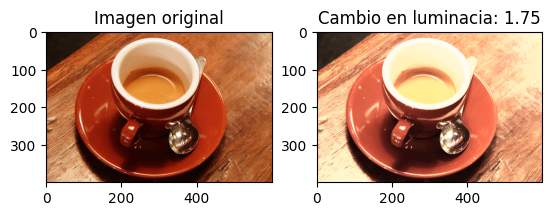

Disminuimos la luminancia en un 75%


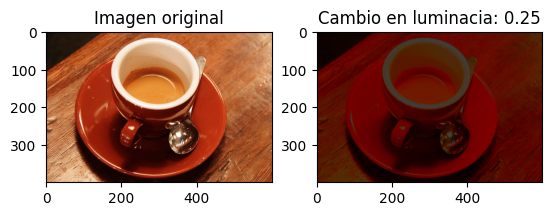

Variamos la luminancia aleatoriamente entre un 0% y un 200%


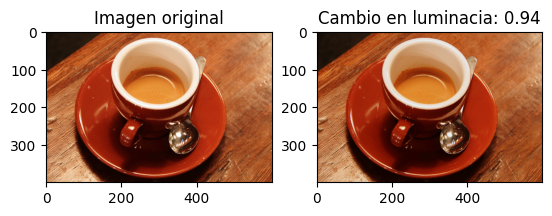

In [31]:
print('Aumentamos la luminancia en un 75%')
change_lum(cafe, 1.75)

print('Disminuimos la luminancia en un 75%')
change_lum(cafe, 0.25)

print('Variamos la luminancia aleatoriamente entre un 0% y un 200%')
change_lum(cafe, np.random.uniform(0,2))

#### Efectos sobre la foto del gato

Aumentamos la luminancia en un 75%


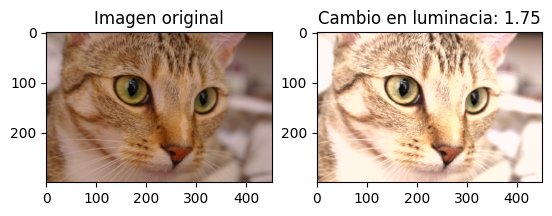

Disminuimos la luminancia en un 75%


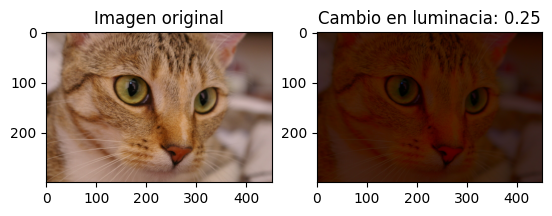

Variamos la luminancia aleatoriamente entre un 0% y un 200%


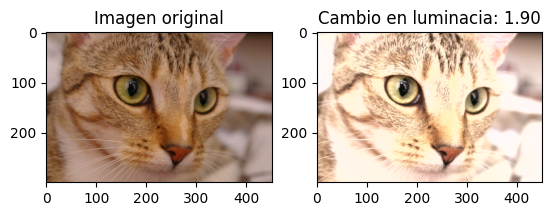

In [32]:
print('Aumentamos la luminancia en un 75%')
change_lum(cat, 1.75)

print('Disminuimos la luminancia en un 75%')
change_lum(cat, 0.25)

print('Variamos la luminancia aleatoriamente entre un 0% y un 200%')
change_lum(cat, np.random.uniform(0,2))

### Variación de cromaticidad

In [36]:
def change_crom(img, beta):
    '''
    Modifica la cromaticidad de la imagen img según beta.
    Al final se compara la imagen original junto a la modificada.
    '''

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la cromaticidad según beta en I
    img_YIQ[:,:,1] = np.clip(img_YIQ[:,:,1] * beta, -0.5957, 0.5957)

    # Modificamos la cromaticidad según beta en Q
    img_YIQ[:,:,2] = np.clip(img_YIQ[:,:,2] * beta, -0.5226, 0.5226)

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    # Graficamos comparativamente
    _, axs = plt.subplots(1, 2)

    axs[0].imshow(img)
    axs[0].set_title('Imagen original')
    axs[1].imshow(img_RGB)
    axs[1].set_title(f'Cambio en cromaticidad: {beta:.2f}')

    plt.show()

#### Efectos sobre la foto del cafe

Aumentamos la cromaticidad en un 75%


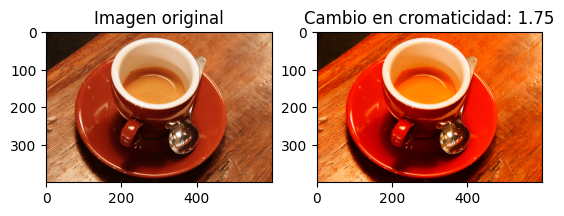

Disminuimos la cromaticidad en un 75%


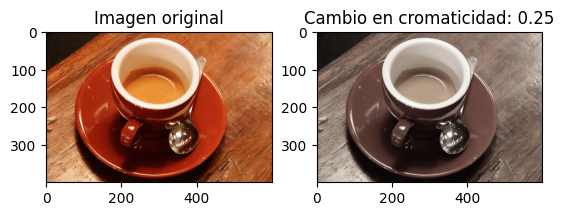

Variamos la cromaticidad aleatoriamente entre un 0% y un 200%


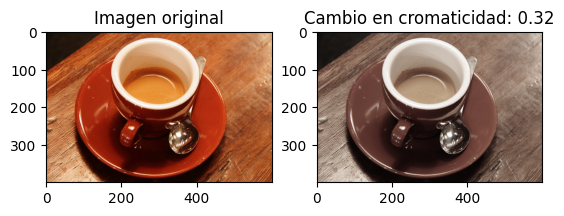

In [37]:
print('Aumentamos la cromaticidad en un 75%')
change_crom(cafe, 1.75)

print('Disminuimos la cromaticidad en un 75%')
change_crom(cafe, 0.25)

print('Variamos la cromaticidad aleatoriamente entre un 0% y un 200%')
change_crom(cafe, np.random.uniform(0,2))

#### Efectos sobre la foto del gato

Aumentamos la cromaticidad en un 75%


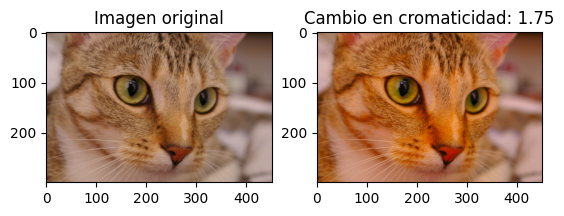

Disminuimos la cromaticidad en un 75%


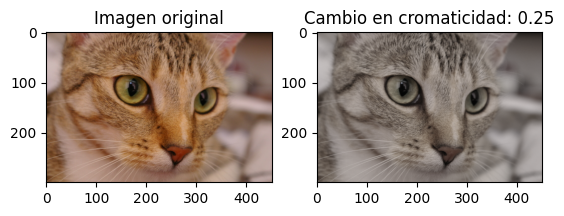

Variamos la cromaticidad aleatoriamente entre un 0% y un 200%


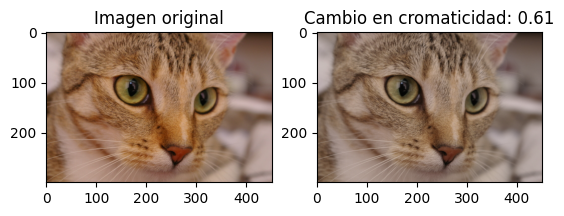

In [38]:
print('Aumentamos la cromaticidad en un 75%')
change_crom(cat, 1.75)

print('Disminuimos la cromaticidad en un 75%')
change_crom(cat, 0.25)

print('Variamos la cromaticidad aleatoriamente entre un 0% y un 200%')
change_crom(cat, np.random.uniform(0,2))

## Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

### Definición de funciones

In [86]:
def gamma_corr(img, gamma):
    '''
    Aplica una corrección gamma según sobre las luminancias de la imagen img, 
    i.e. permite manipular el histograma según una ley de potencias, donde 
    gamma toma valores reales positivos.

    Al final se compara la imagen original junto a la modificada y sus 
    respectivos histogramas.
    '''

    nBin = np.linspace(0, 1, 50)

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)
    hist_pre = np.histogram(img_YIQ[:,:,0], bins=nBin, range=(0,1))

    # Modificamos la luminancia según gamma
    img_YIQ[:,:,0] = np.clip(img_YIQ[:,:,0] ** gamma, 0 , 1)
    hist_post = np.histogram(img_YIQ[:,:,0], bins=nBin, range=(0,1))

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    # Graficamos comparativamente
    _, axs = plt.subplots(2, 2)

    axs[0, 0].imshow(img)
    axs[0, 0].set_title('Imagen original')
    axs[1, 0].stairs(hist_pre[0]/np.sum(hist_pre[0]), hist_pre[1], fill=True)

    axs[0, 1].imshow(img_RGB)
    axs[0, 1].set_title(f'Corrección gamma: {gamma:.2f}')
    axs[1, 1].stairs(hist_post[0]/np.sum(hist_post[0]), hist_post[1], fill=True)

    plt.show()

In [115]:
def partes_corr(img, m, M):
    '''
    Modifica el histogramas de luminancias de la imagen img mediante una 
    función lineal por partes.

    Dadas la mínima (m) y la máxima (M) luminancias deseadas:
        * Lleva a cero a toda luminancia menor a m.
        * Lleva a uno a toda luminancia mayor a M.
        * Mapea los valores intermedios según una función lineal.

    Al final se compara la imagen original junto a la modificada y sus 
    respectivos histogramas.
    '''

    nBin = np.linspace(0, 1, 50)
    Delta = M - m

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)
    hist_pre = np.histogram(img_YIQ[:,:,0], bins=nBin, range=(0,1))

    # Modificamos la luminancia según m y M
    img_YIQ[:,:,0][img_YIQ[:,:,0] < m] = 0
    img_YIQ[:,:,0][img_YIQ[:,:,0] > M] = 1
    img_YIQ[:,:,0][(img_YIQ[:,:,0] >= m) & (img_YIQ[:,:,0] <= M)] = (img_YIQ[:,:,0][(img_YIQ[:,:,0] >= m) & (img_YIQ[:,:,0] <= M)] - m) / Delta
    hist_post = np.histogram(img_YIQ[:,:,0], bins=nBin, range=(0,1))

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    # Graficamos comparativamente
    _, axs = plt.subplots(2, 2)

    axs[0, 0].imshow(img)
    axs[0, 0].set_title('Imagen original')
    axs[1, 0].stairs(hist_pre[0]/np.sum(hist_pre[0]), hist_pre[1], fill=True)

    axs[0, 1].imshow(img_RGB)
    axs[0, 1].set_title(f'Por partes: {m:.2f}-{M:.2f}')
    axs[1, 1].stairs(hist_post[0]/np.sum(hist_post[0]), hist_post[1], fill=True)

    plt.show()

### Apicamos sobre las imágenes

#### Efectos sobre la foto del cafe

Aplicamos una corrección con una parábola


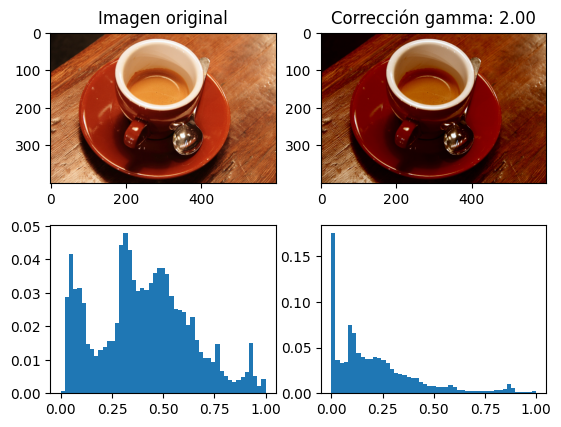

Aplicamos una corrección con una raíz cuadrada


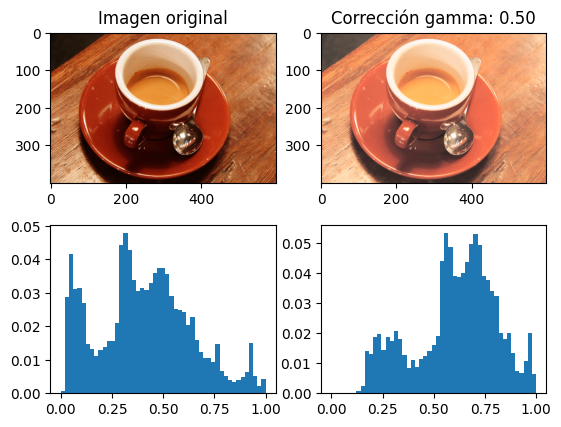

Aplicamos una corrección con una cúbica


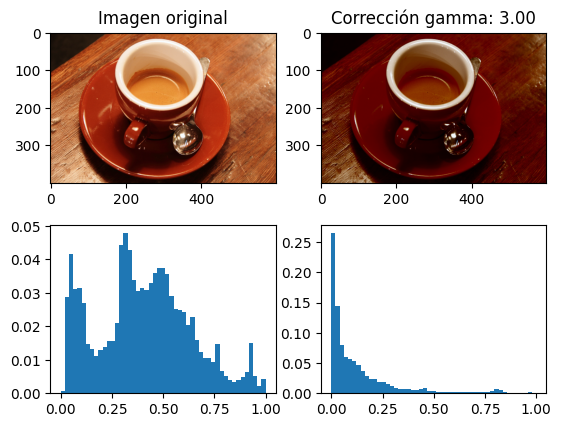

Aplicamos una corrección con una raíz cúbica


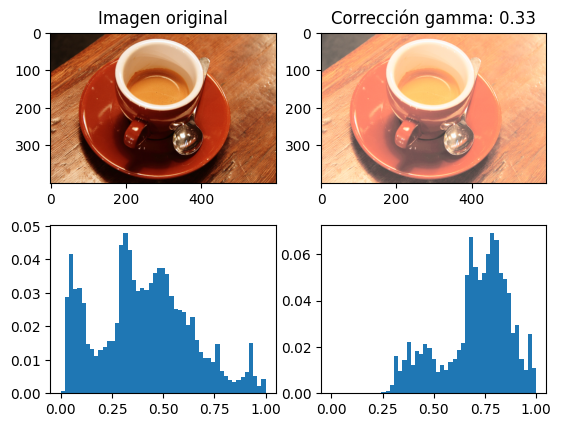

Aplicamos una corrección con lineal por partes entre 0.3 y 0.7


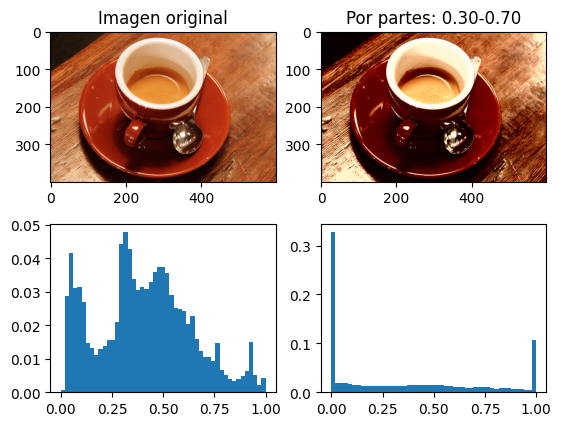

In [116]:
print('Aplicamos una corrección con una parábola')
gamma_corr(cafe, 2)

print('Aplicamos una corrección con una raíz cuadrada')
gamma_corr(cafe, 1/2)

print('Aplicamos una corrección con una cúbica')
gamma_corr(cafe, 3)

print('Aplicamos una corrección con una raíz cúbica')
gamma_corr(cafe, 1/3)

print('Aplicamos una corrección con lineal por partes entre 0.35 y 0.65')
partes_corr(cafe, 0.35, 0.65)


#### Efectos sobre la foto del gato

Aplicamos una corrección con una parábola


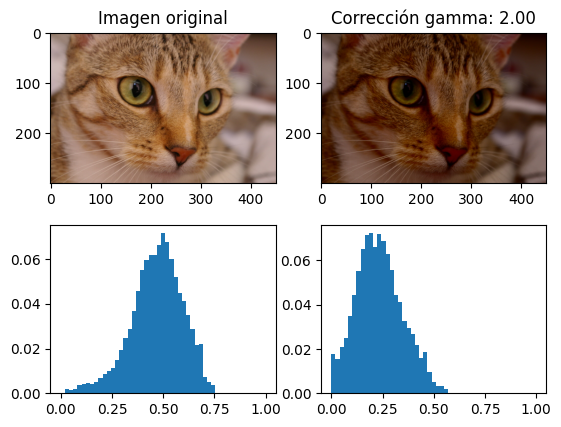

Aplicamos una corrección con una raíz cuadrada


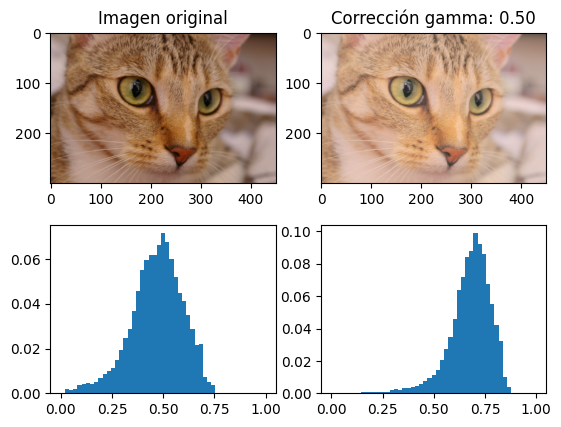

Aplicamos una corrección con una cúbica


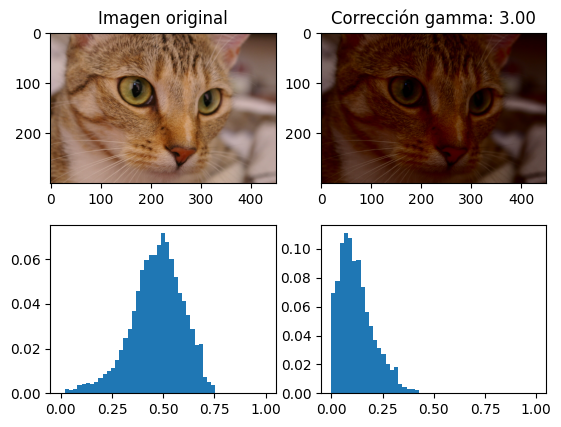

Aplicamos una corrección con una raíz cúbica


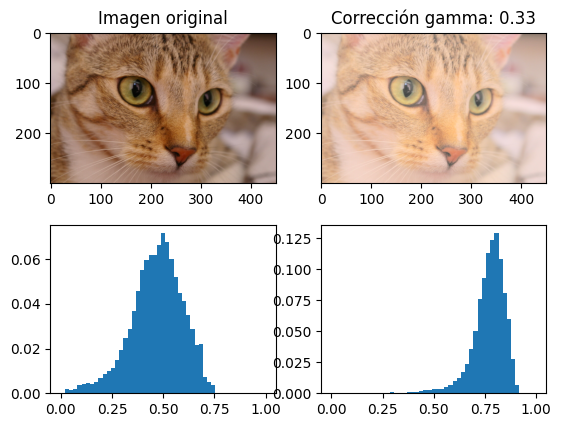

Aplicamos una corrección con lineal por partes entre 0.35 y 0.65


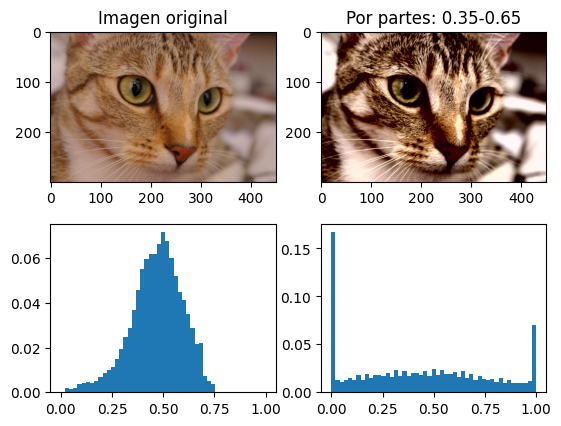

In [117]:
print('Aplicamos una corrección con una parábola')
gamma_corr(cat, 2)

print('Aplicamos una corrección con una raíz cuadrada')
gamma_corr(cat, 1/2)

print('Aplicamos una corrección con una cúbica')
gamma_corr(cat, 3)

print('Aplicamos una corrección con una raíz cúbica')
gamma_corr(cat, 1/3)

print('Aplicamos una corrección con lineal por partes entre 0.35 y 0.65')
partes_corr(cat, 0.35, 0.65)


---
# Ejercicio 2

## Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.